#Step 1 : Import libraries

matplotlib.pyplot: For plotting visualizations like training/validation accuracy and loss curves, and displaying confusion matrices.

numpy: For numerical operations and handling arrays, especially during data processing and class weight calculations.

os: For file system operations, such as listing files and constructing file paths.

tensorflow: For building, training, and evaluating deep learning models (using Keras API).

pandas: For handling structured data (e.g., image file paths and labels) in DataFrames.

seaborn: For advanced visualizations, such as heatmaps of confusion matrices.

PIL: For image loading and basic image processing.

tensorflow.keras: For creating and training neural networks using Keras layers, models, and image preprocessing functions.

sklearn.utils.class_weight: For computing class weights to handle class imbalance.

sklearn.model_selection.train_test_split: For splitting the dataset into training, validation, and test sets.

sklearn.metrics.confusion_matrix: For evaluating model performance using a confusion matrix.

sklearn.metrics.classification_report: For generating a detailed classification report (precision, recall, F1-score).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import pandas as pd
import seaborn as sns

from PIL import Image

from tensorflow.keras import Sequential, datasets, layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


#Step 2 : Upload Kaggle Dataset


In [ ]:
#Upload Kaggle JSON file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aishleemath","key":"4ad33555f42bee6c808a8de1ce20d438"}'}

In [ ]:
#Creates a .kaggle directory in the home folder.
!mkdir -p ~/.kaggle

#Copies kaggle.json API key into the .kaggle directory.
!cp kaggle.json ~/.kaggle/

#Secures the API key by setting read/write permissions only for the owner.
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
#Downloads the dataset from Kaggle to Colab
!kaggle datasets download -d uraninjo/augmented-alzheimer-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset
License(s): GNU Lesser General Public License 3.0
100% 378M/380M [00:01<00:00, 257MB/s]
100% 380M/380M [00:01<00:00, 251MB/s]


In [ ]:
#Unzips the dataset(The dataset is downloaded as a compressed file by default)
!unzip augmented-alzheimer-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: OriginalDataset/NonDemented/31 (10).jpg  
  inflating: OriginalDataset/NonDemented/31 (100).jpg  
  inflating: OriginalDataset/NonDemented/31 (11).jpg  
  inflating: OriginalDataset/NonDemented/31 (12).jpg  
  inflating: OriginalDataset/NonDemented/31 (13).jpg  
  inflating: OriginalDataset/NonDemented/31 (14).jpg  
  inflating: OriginalDataset/NonDemented/31 (15).jpg  
  inflating: OriginalDataset/NonDemented/31 (16).jpg  
  inflating: OriginalDataset/NonDemented/31 (17).jpg  
  inflating: OriginalDataset/NonDemented/31 (18).jpg  
  inflating: OriginalDataset/NonDemented/31 (19).jpg  
  inflating: OriginalDataset/NonDemented/31 (2).jpg  
  inflating: OriginalDataset/NonDemented/31 (20).jpg  
  inflating: OriginalDataset/NonDemented/31 (21).jpg  
  inflating: OriginalDataset/NonDemented/31 (22).jpg  
  inflating: OriginalDataset/NonDemented/31 (23).jpg  
  inflating: OriginalDataset/NonDemented/31 (24).jpg  
  inflating: O

In [ ]:
# List files in the current directory
os.listdir()

['.config',
 'kaggle.json',
 'AugmentedAlzheimerDataset',
 'OriginalDataset',
 'augmented-alzheimer-mri-dataset.zip',
 'sample_data']

#Step 3 : Preparing the dataset

In [ ]:
#Defining directories
MildDemented_drct = "/content/AugmentedAlzheimerDataset/MildDemented"
ModerateDemented_drct = "/content/AugmentedAlzheimerDataset/ModerateDemented"
NonDemented_drct = "/content/AugmentedAlzheimerDataset/NonDemented"
VeryMildDemented_drct = "/content/AugmentedAlzheimerDataset/VeryMildDemented"

#Initialize lists for file paths and labels
filepaths = []
labels = []

#Define directory list and class labels
dict_list = [MildDemented_drct, ModerateDemented_drct, NonDemented_drct, VeryMildDemented_drct]
class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']

#Loop through directories to collect file paths and labels
for i, j in enumerate(dict_list):
    flist = os.listdir(j)
    for f in flist:
        fpath = os.path.join(j, f)
        filepaths.append(fpath)
        labels.append(class_labels[i])

#Create Pandas dataframe
Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
Alzheimer_data = pd.concat([Fseries, Lseries], axis=1)
Alzheimer_df = pd.DataFrame(Alzheimer_data)

#Display the first few rows of the dataframe
print(Alzheimer_df.head())
print(Alzheimer_df["labels"].value_counts())

                                           filepaths         labels
0  /content/AugmentedAlzheimerDataset/MildDemente...  Mild Demented
1  /content/AugmentedAlzheimerDataset/MildDemente...  Mild Demented
2  /content/AugmentedAlzheimerDataset/MildDemente...  Mild Demented
3  /content/AugmentedAlzheimerDataset/MildDemente...  Mild Demented
4  /content/AugmentedAlzheimerDataset/MildDemente...  Mild Demented
labels
Non Demented         9600
Mild Demented        8960
Very MildDemented    8960
Moderate Demented    6464
Name: count, dtype: int64


In [ ]:
#Get dimensions of the dataframe
Alzheimer_df.shape

(33984, 2)

#Step 4 : Splitting the dataset

In [ ]:
# Split the data into training, validation, and testing sets
train_images, test_images = train_test_split(Alzheimer_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(Alzheimer_df, test_size=0.2, random_state=42)

In [ ]:
# Print the shapes of the different datasets
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(27187, 2)
(10196, 2)
(6797, 2)
(23788, 2)


#Step 5 : Image processing

In [ ]:
# Create an ImageDataGenerator instance for preprocessing using mobilenet
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)

# Create a data generator for the training set
train = image_gen.flow_from_dataframe(dataframe= train_set,x_col="filepaths",y_col="labels",
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical", #used for Sequential Model
                                      batch_size=32,
                                      shuffle=True
                                     )

# Create a data generator for the testing set
test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="labels",
                                     target_size=(244,244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=32,
                                     shuffle= False
                                    )
# Create a data generator for the validation set
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=32,
                                    shuffle=False
                                   )

Found 27187 validated image filenames belonging to 4 classes.
Found 10196 validated image filenames belonging to 4 classes.
Found 6797 validated image filenames belonging to 4 classes.


#Step 6 : Computing class weights

In [ ]:
# Compute class weights
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train.classes),
    y=train.classes
)

# Convert to dictionary (for passing into model.fit)
class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)

{0: 0.9483396121110647, 1: 1.319757281553398, 2: 0.8801800051800052, 3: 0.9508603805260213}


In [ ]:
# Get the class names from the training data generator and print them.
classes=list(train.class_indices.keys())
print (classes)

['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']


#Step 7 : Visualizing the dataset

In [ ]:
# Function to display a grid of images from the provided image generator, along with their corresponding class labels.
def show_zheimer_images(image_gen):
    test_dict = test.class_indices     # Get class names from the 'test' generator
    classes = list(test_dict.keys())
    images, labels=next(image_gen) # Get a sample batch from the generator
    plt.figure(figsize=(20,20))  # Create a figure to display the images
    length = len(labels)      # Determine the number of images to display (up to 25)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):     # Loop through images and display them
        plt.subplot(5, 5, i + 1)  # Create subplots in a 5x5 grid
        image = (images[i] + 1) / 2  # Scale image pixels to 0-1 range for display
        plt.imshow(image)  # Display the image
        index = np.argmax(labels[i])  # Get the predicted class index
        class_name = classes[index]  # Get the class name using the index
        plt.title(class_name, color="green", fontsize=16)  # Set title with class name
        plt.axis('off')  # Turn off axis ticks and labels
    plt.show()  # Show the plot with all images

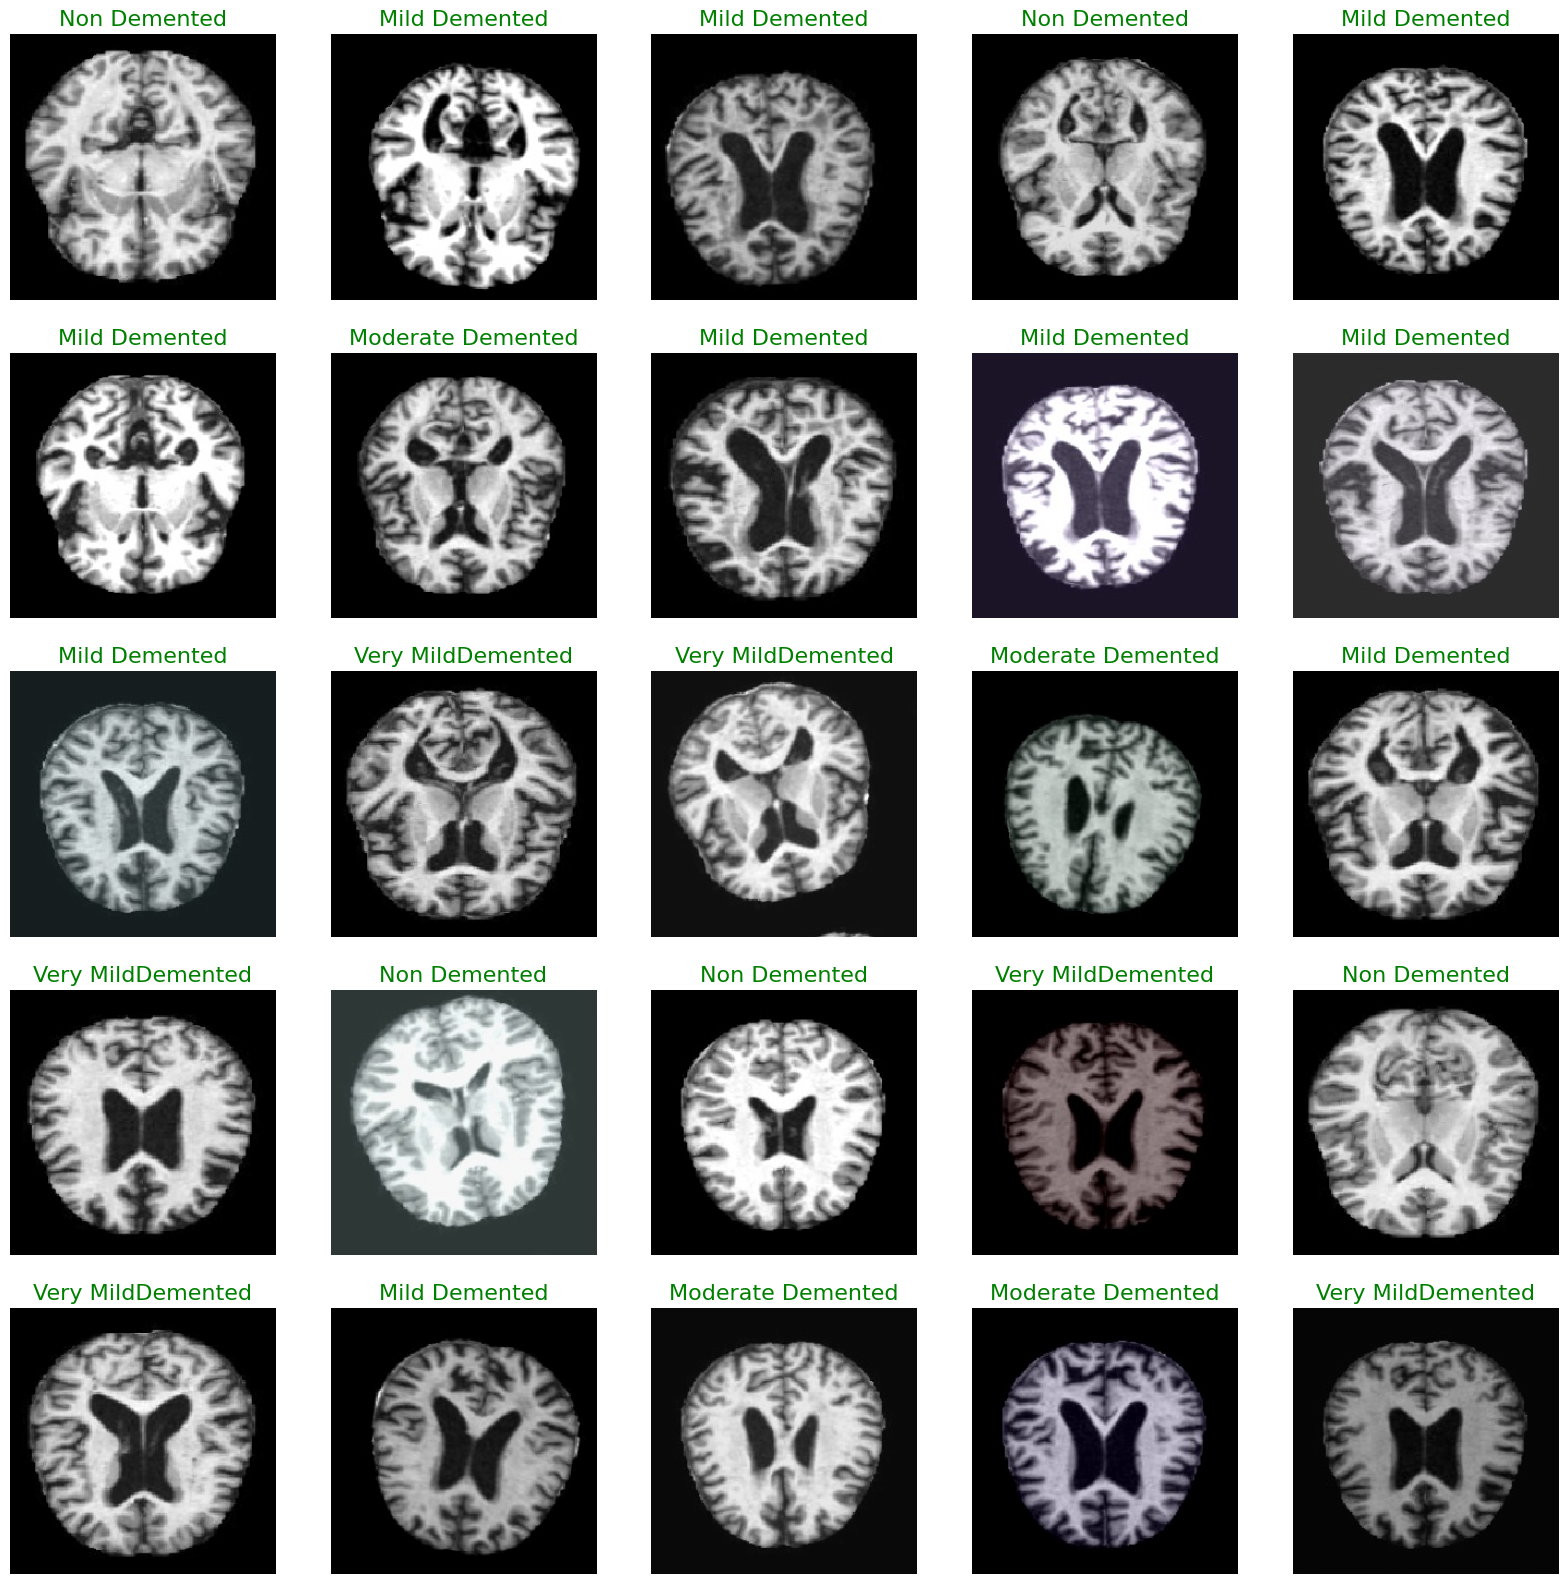

In [ ]:
show_zheimer_images(train) #Displays a grid of images from the  image generator, along with their corresponding class labels.


#Step 8 : Building the model

In [ ]:
# Initialize the CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(244, 244, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(len(classes), activation='softmax'))  # Output layer for multi-class classification


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Step 9 : Training and evaluating the model

Epoch 1/90


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


850/850 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.4589 - loss: 1.1624 - val_accuracy: 0.7066 - val_loss: 0.6474 - learning_rate: 0.0010
Epoch 2/90
850/850 ━━━━━━━━━━━━━━━━━━━━ 66s 73ms/step - accuracy: 0.6856 - loss: 0.6406 - val_accuracy: 0.8074 - val_loss: 0.4756 - learning_rate: 0.0010
Epoch 3/90
850/850 ━━━━━━━━━━━━━━━━━━━━ 63s 74ms/step - accuracy: 0.7723 - loss: 0.4784 - val_accuracy: 0.8374 - val_loss: 0.3839 - learning_rate: 0.0010
Epoch 4/90
850/850 ━━━━━━━━━━━━━━━━━━━━ 62s 72ms/step - accuracy: 0.8166 - loss: 0.3902 - val_accuracy: 0.8348 - val_loss: 0.3909 - learning_rate: 0.0010
Epoch 5/90
850/850 ━━━━━━━━━━━━━━━━━━━━ 83s 73ms/step - accuracy: 0.8329 - loss: 0.3425 - val_accuracy: 0.8635 - val_loss: 0.3395 - learning_rate: 0.0010
Epoch 6/90
850/850 ━━━━━━━━━━━━━━━━━━━━ 61s 72ms/step - accuracy: 0.8577 - loss: 0.2996 - val_accuracy: 0.8605 - val_loss: 0.3449 - learning_rate: 0.0010
Epoch 7/90
850/850 ━━━━━━━━━━━━━━━━━━━━ 62s 73ms/step - accuracy: 0.8693 - loss: 0.2661

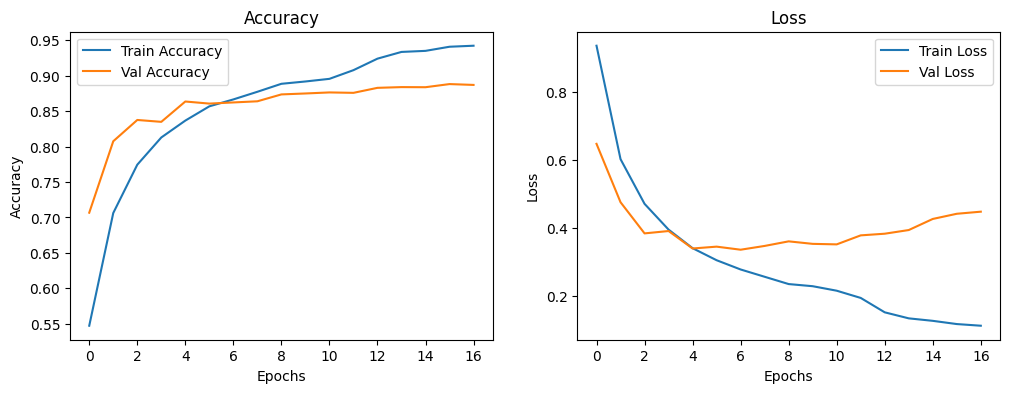

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(train,
                    validation_data=val,
                    epochs=90,
                    callbacks=[reduce_lr, early_stopping],class_weight=class_weight_dict)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Plotting training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#Step 10 : Further Evaluation

319/319 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step


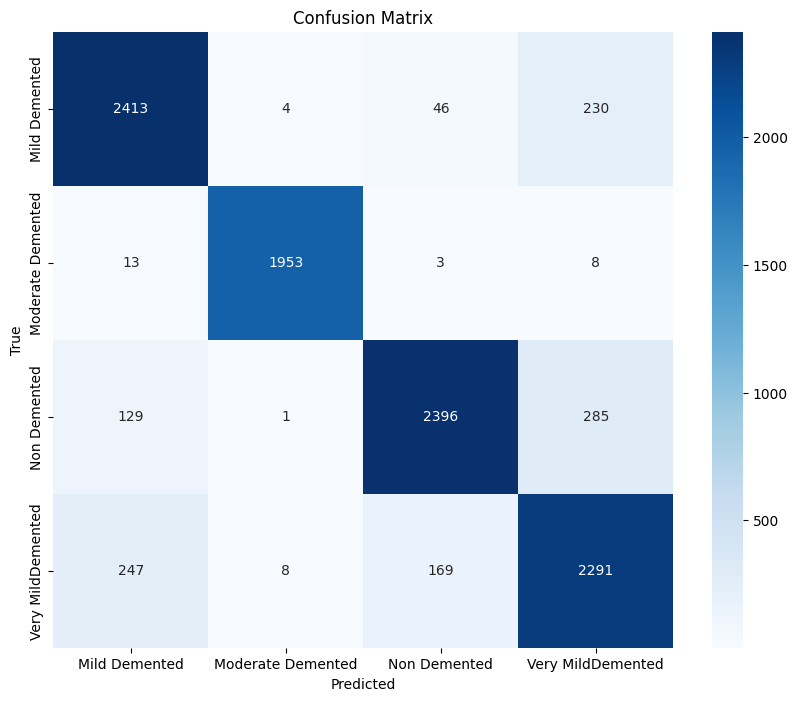

In [ ]:
#Make predictions on the test set
predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test.classes  # True labels

#Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test.class_indices.keys()),
            yticklabels=list(test.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
# Get the class names
class_names = list(test.class_indices.keys())

# Print classification report
report = classification_report(true_classes, predicted_classes, target_names=class_names)
print(report)


                   precision    recall  f1-score   support

    Mild Demented       0.86      0.90      0.88      2693
Moderate Demented       0.99      0.99      0.99      1977
     Non Demented       0.92      0.85      0.88      2811
Very MildDemented       0.81      0.84      0.83      2715

         accuracy                           0.89     10196
        macro avg       0.90      0.90      0.90     10196
     weighted avg       0.89      0.89      0.89     10196

